## Main Question: What do covid case percentages look like compared to the percent of the population vaccinated in Arizona?

In [31]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chisquare

In [32]:
# Import cleaned csv
csvfile1 = "Resources/Cleaned_Vaccine_Case_Data.csv"

# Add as DataFrame
main_df = pd.read_csv(csvfile1)
main_df

,Unnamed: 0,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...,...
339,360,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,361,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,362,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542
342,364,86505,8036,137,12.40,36.62,101-500,54,"11-1,000",23767


In [33]:
# Drop the "Unnamed: 0" column
del main_df["Unnamed: 0"]
main_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542
342,86505,8036,137,12.40,36.62,101-500,54,"11-1,000",23767


In [34]:
# Drop "1-10" values in "Total Case Count"
clean_df = main_df.drop(main_df.loc[main_df["Total Case Count"] == "1-10"].index)
#clean_df = main_df.loc[main_df["Total Case Count"] != "1-10"]
clean_df

# Add new column called "Case Rate"
clean_df["Case Rate"] = " "
clean_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,
...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,


#### Find COVID-19 case rate by zipcode (total cases / total population)

In [35]:
# Create empty list for case rate data, cases, and population
case_rates = []
cases = []
pop = []

# For loop to find rate for each zipcode
for index, row in clean_df.iterrows():
    # Get cases and population totals 
    cases = int(row["Total Case Count"])
    pop = int(row["Total Population"])
    # Take the number of cases and divide it by total population
    try:
        rates = cases / pop
        case_rates.append(rates)

    # If there is a population with 0, enter "0"
    except (ZeroDivisionError):
        case_rates.append(0)
# Store the case rates into dataframe
clean_df["Case Rate"] = case_rates
clean_df["Case Rate"] = clean_df["Case Rate"].astype(float).map("{:.2f}%".format)
clean_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,0.18%
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,0.14%
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,0.12%
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,0.17%
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,0.15%
...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,0.12%
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,0.05%
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,0.05%
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,0.45%


### Find COVID-19 vaccine rate by zipcode (total vaccinated / total population)

In [36]:
# Drop "1-10" values in "Total Case Count"
vacc_df = clean_df.drop(clean_df.loc[clean_df["Total Vaccinated"] == "1-10"].index)
vacc_df

# Add new column called "Vaccine Case Rate"
vacc_df["Vaccine Rate"] = " "
vacc_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate,Vaccine Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,0.18%,
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,0.14%,
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,0.12%,
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,0.17%,
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,0.15%,
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,0.12%,
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,0.05%,
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,0.05%,
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,0.45%,


In [37]:
# Create empty list for vaccine rate data, cases, and population
vaccine_rates = []
total_vacc = []
population = []

# For loop to find rate for each zipcode
for index, row in vacc_df.iterrows():
    # Get cases and population totals 
    total_vacc = int(row["Total Vaccinated"])
    population = int(row["Total Population"])
    # Take the number of cases and divide it by total population
    try:
        vac_rate = total_vacc / population
        vaccine_rates.append(vac_rate)

    # If there is a population with 0, enter "0"
    except (ZeroDivisionError):
        vaccine_rates.append(0)
# Store the case rates into dataframe
vacc_df["Vaccine Rate"] = vaccine_rates
vacc_df["Vaccine Rate"] = vacc_df["Vaccine Rate"].astype(float).map("{:.2f}%".format)
vacc_df

,POSTCODE,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income,Case Rate,Vaccine Rate
0,85003,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140,0.18%,0.58%
1,85004,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951,0.14%,0.60%
2,85006,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121,0.12%,0.25%
3,85007,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667,0.17%,0.33%
4,85008,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574,0.15%,0.23%
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600,0.12%,0.23%
339,86444,1254,60,34.27,49.25,11-100,450,"11-1,000",46389,0.05%,0.36%
340,86445,254,12,12.73,20.45,11-100,42,"11-1,000",51150,0.05%,0.17%
341,86502,1095,497,34.12,47.10,101-500,265,"11-1,000",18542,0.45%,0.24%


### Total cases versus total vaccinated

In [38]:
# Organize columns to clean up dataframe 
#print(vacc_df.columns)
organized_df = vacc_df[['POSTCODE', 'Case Rate', 'Vaccine Rate', 'Total Population', 'Total Case Count', '% Cases Over Age 18', '% Cases Over Age 65', 'Total Cases Category','Total Vaccinated', 'Total      Vaccinated Category','Median Household Income']]
organized_df

,POSTCODE,Case Rate,Vaccine Rate,Total Population,Total Case Count,% Cases Over Age 18,% Cases Over Age 65,Total Cases Category,Total Vaccinated,Total Vaccinated Category,Median Household Income
0,85003,0.18%,0.58%,8499,1534,46.20,74.49,Greater Than 1000,4898,"1,001-5,000",44140
1,85004,0.14%,0.60%,7164,969,63.68,61.45,501-1000,4281,"1,001-5,000",41951
2,85006,0.12%,0.25%,27206,3272,35.85,54.55,Greater Than 1000,6780,"5,001-10,000",38121
3,85007,0.17%,0.33%,14428,2424,41.44,63.91,Greater Than 1000,4719,"1,001-5,000",34667
4,85008,0.15%,0.23%,62340,9079,33.01,56.27,Greater Than 1000,14187,"Greater Than 10,000",43574
...,...,...,...,...,...,...,...,...,...,...,...
337,86442,0.12%,0.23%,33895,4071,27.17,48.51,Greater Than 1000,7922,"5,001-10,000",39600
339,86444,0.05%,0.36%,1254,60,34.27,49.25,11-100,450,"11-1,000",46389
340,86445,0.05%,0.17%,254,12,12.73,20.45,11-100,42,"11-1,000",51150
341,86502,0.45%,0.24%,1095,497,34.12,47.10,101-500,265,"11-1,000",18542


<BarContainer object of 325 artists>

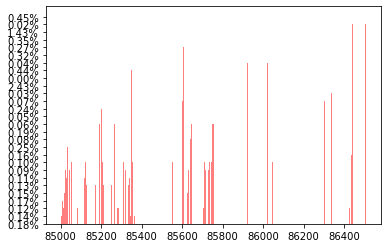

In [39]:
# Bar chart of case rate by zipcode 
plt.bar(organized_df["POSTCODE"], organized_df["Case Rate"], color="r", alpha=0.5, align="center")

<BarContainer object of 325 artists>

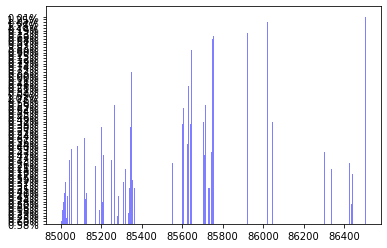

In [40]:
# Bar chart of vaccine rate by zipcode 
plt.bar(organized_df["POSTCODE"], organized_df["Vaccine Rate"], color="b", alpha=0.5, align="center")
#plt.xticks(rotation="vertical")


<Figure size 72000x72000 with 0 Axes>

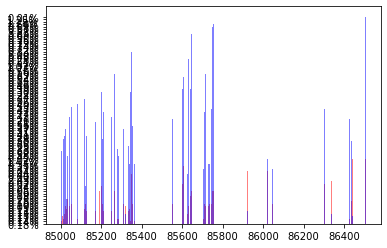

<Figure size 72000x72000 with 0 Axes>

In [41]:
plt.bar(organized_df["POSTCODE"], organized_df["Case Rate"], color="r", alpha=0.5, align="center")
plt.bar(organized_df["POSTCODE"], organized_df["Vaccine Rate"], color="b", alpha=0.5, align="center")
plt.figure(figsize=(1000, 1000))

Text(0, 0.5, 'COVID-19 Vaccine Rate Per Zipcode')

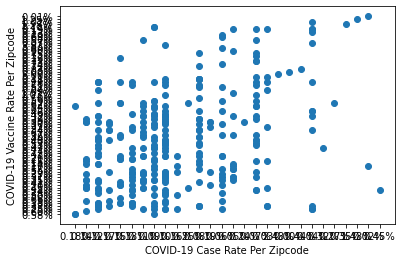

In [42]:
# Scatterplot 
#print(organized_df["Case Rate"].unique())
#print(organized_df["Vaccine Rate"].unique())

plt.scatter(organized_df["Case Rate"], organized_df["Vaccine Rate"])
plt.xlabel("COVID-19 Case Rate Per Zipcode")
plt.ylabel("COVID-19 Vaccine Rate Per Zipcode")
#xticks = [0.00, 0.05%, 0.10%, 0.15%] 
#plt.xticks(xticks, rotation="vertical")
#plt.xticks(np.arange(0, len(organized_df["Case Rate"])+1, 5))

#plt.xticks(np.arange(min(organized_df["Case Rate"]), max(organized_df["Case Rate"]+1), 1.0))

#xlim = 


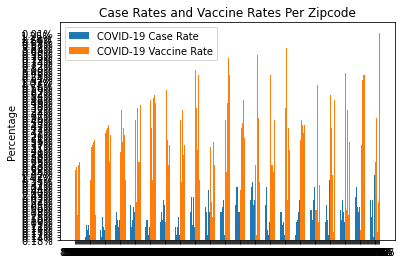

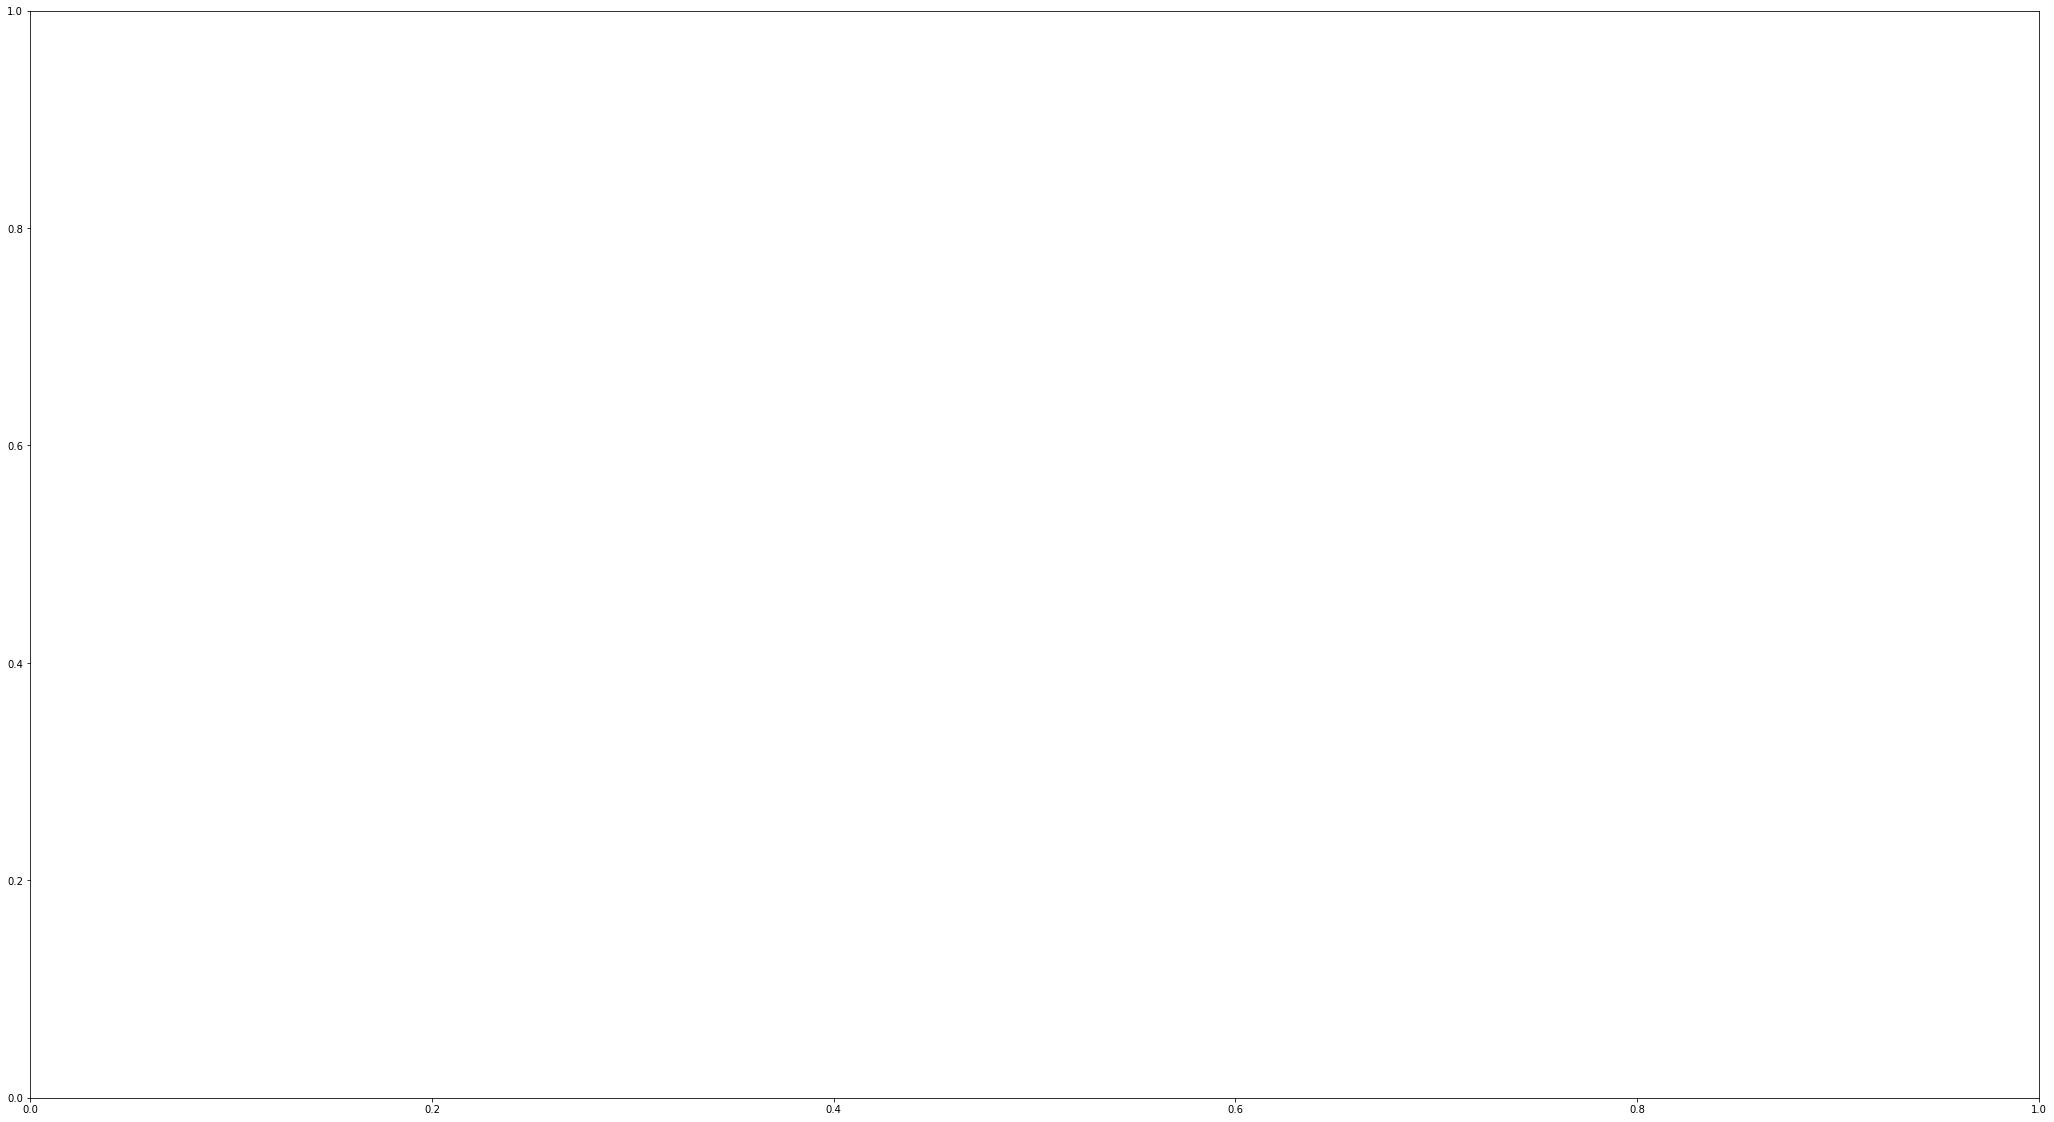

In [44]:

x = np.arange(len(organized_df["POSTCODE"]))
labels = organized_df["POSTCODE"]
width = 0.35
fig, ax = plt.subplots()
cases = ax.bar(x - width/2, organized_df["Case Rate"], width, label='COVID-19 Case Rate')
vaccines = ax.bar(x + width/2, organized_df["Vaccine Rate"], width, label='COVID-19 Vaccine Rate')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Case Rates and Vaccine Rates Per Zipcode')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(cases, padding=3)
#ax.bar_label(vaccines, padding=3)
plt.subplots(figsize=(36,20))

#fig.tight_layout()

plt.show()

In [45]:
'''
# Chi squared???

# see if differences are statistically significant 

for i in organized_df.index:
    # Convert back into a number (no percentages)
    #vacc_df["Vaccine Rate"] = vacc_df["Vaccine Rate"].astype(float).map("{:.2f}%".format)
    # Case rate
    x = int(organized_df.iloc[i, 1])
    # Vaccine rate
    y = int(organized_df[i, 2])
    #prob = 0.95
    chi2(x, y)
#prob = 0.95

'''



'\n# Chi squared???\n\n# see if differences are statistically significant \n\nfor i in organized_df.index:\n    # Convert back into a number (no percentages)\n    #vacc_df["Vaccine Rate"] = vacc_df["Vaccine Rate"].astype(float).map("{:.2f}%".format)\n    # Case rate\n    x = int(organized_df.iloc[i, 1])\n    # Vaccine rate\n    y = int(organized_df[i, 2])\n    #prob = 0.95\n    chi2(x, y)\n#prob = 0.95\n\n'